## Librerías

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import layers, models

## Datasets

In [4]:
data_train = np.array(pd.read_csv('_data_train.csv'))[:,1]
labels_train = np.array(pd.read_csv('_labels_train.csv'))[:,1]
data_test = np.array(pd.read_csv('_data_test.csv'))[:,1]
labels_test = np.array(pd.read_csv('_labels_test.csv'))[:,1]

#### Cambiar estructura y normalizar

In [5]:
data_train = data_train.reshape(2500, 80, 120) / 255
data_test = data_test.reshape(2500, 80, 120) / 255

## Modelo (MLP)

In [157]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(80, 120)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(data_train, labels_train, epochs=10) 

Epoch 1/10
79/79 [==============================] - 6s 66ms/step - loss: 0.3671 - accuracy: 0.9900
Epoch 2/10
79/79 [==============================] - 5s 63ms/step - loss: 0.0838 - accuracy: 0.9836
Epoch 3/10
79/79 [==============================] - 5s 57ms/step - loss: 0.0557 - accuracy: 0.9901
Epoch 4/10
79/79 [==============================] - 4s 57ms/step - loss: 0.0775 - accuracy: 0.9853
Epoch 5/10
79/79 [==============================] - 5s 60ms/step - loss: 0.0735 - accuracy: 0.9862
Epoch 6/10
79/79 [==============================] - 5s 58ms/step - loss: 0.0575 - accuracy: 0.9898
Epoch 7/10
79/79 [==============================] - 5s 60ms/step - loss: 0.0604 - accuracy: 0.9893
Epoch 8/10
79/79 [==============================] - 5s 59ms/step - loss: 0.0679 - accuracy: 0.9875
Epoch 9/10
79/79 [==============================] - 5s 57ms/step - loss: 0.0769 - accuracy: 0.9855
Epoch 10/10
79/79 [==============================] - 5s 58ms/step - loss: 0.0635 - accuracy: 0.9886


In [121]:
test_loss, test_acc = model.evaluate(data_test, labels_test)

print('Precisión:', test_acc) 

79/79 [==============================] - 0s 3ms/step - loss: 0.2091 - accuracy: 0.9836
Precisión: 0.9836000204086304


In [158]:
predictions = model.predict(data_test)
predictions

array([[1.0000000e+00, 1.1065112e-14],
       [1.0000000e+00, 2.4610580e-18],
       [1.0000000e+00, 5.2238735e-17],
       ...,
       [1.0000000e+00, 5.2363988e-11],
       [1.0000000e+00, 3.5168129e-11],
       [1.0000000e+00, 2.8550396e-11]], dtype=float32)

In [153]:
predictions.shape

(2500, 2)

In [159]:
labels_pred = np.zeros(2500).astype(int)

for _ in range(0,2500):
    if predictions[_,0] == 1:
        labels_pred[_] = 0
    else:
        labels_pred[_] = 1

In [163]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels_pred, labels_test)

array([[2459,   41],
       [   0,    0]])

In [131]:
np.where(labels_test == 1)

(array([   9,   59,   61,  352,  353,  402,  403,  734,  735, 1125, 1126,
        1127, 1175, 1176, 1177, 1225, 1226, 1227, 1275, 1276, 1277, 1325,
        1326, 1327, 1375, 1376, 1377, 1425, 1426, 1427, 1475, 1476, 1477,
        1525, 1526, 1527, 1575, 1577, 1625, 1626, 1627]),)

In [133]:
labels_pred[0]

1

## Modelo (CNN)

In [122]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(80, 120, 1)))
model_cnn.add(layers.MaxPooling2D((2, 2)))

model_cnn.add(layers.Flatten())
#model_cnn.add(layers.Dense(1000, activation='relu'))
model_cnn.add(layers.Dense(100, activation='relu'))
model_cnn.add(layers.Dense(2, activation='softmax'))

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.fit(data_train.reshape(-1, 80, 120, 1), labels_train, epochs=10, 
                    validation_data=(data_test.reshape(-1, 80, 120, 1), labels_test))

Epoch 1/10
79/79 [==============================] - 13s 160ms/step - loss: 0.1955 - accuracy: 0.9891 - val_loss: 2.0646 - val_accuracy: 0.9836
Epoch 2/10
79/79 [==============================] - 12s 157ms/step - loss: 0.0800 - accuracy: 0.9857 - val_loss: 2.3036 - val_accuracy: 0.9836
Epoch 3/10
79/79 [==============================] - 13s 158ms/step - loss: 0.0826 - accuracy: 0.9865 - val_loss: 2.1654 - val_accuracy: 0.9836
Epoch 4/10
79/79 [==============================] - 13s 170ms/step - loss: 0.0857 - accuracy: 0.9849 - val_loss: 1.8063 - val_accuracy: 0.9836
Epoch 5/10
79/79 [==============================] - 12s 151ms/step - loss: 0.0716 - accuracy: 0.9870 - val_loss: 1.8124 - val_accuracy: 0.9836
Epoch 6/10
79/79 [==============================] - 13s 164ms/step - loss: 0.0675 - accuracy: 0.9881 - val_loss: 2.4024 - val_accuracy: 0.9836
Epoch 7/10
79/79 [==============================] - 12s 153ms/step - loss: 0.0700 - accuracy: 0.9899 - val_loss: 1.7372 - val_accuracy: 0.9836

In [123]:
test_loss, test_acc = model_cnn.evaluate(data_test.reshape(-1, 80, 120, 1), labels_test)

print('Precisión:', test_acc) 

79/79 [==============================] - 3s 32ms/step - loss: 1.6509 - accuracy: 0.9836
Precisión: 0.9836000204086304


In [154]:
predictions_cnn = model_cnn.predict(data_test.reshape(-1, 80, 120, 1))
predictions_cnn

array([[1.0000000e+00, 1.6929619e-34],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 1.7066058e-25],
       [1.0000000e+00, 1.9369459e-25],
       [1.0000000e+00, 2.7342304e-26]], dtype=float32)

In [161]:
labels_pred_cnn = np.zeros(2500).astype(int)

for _ in range(0,2500):
    if predictions_cnn[_,0] == 1:
        labels_pred_cnn[_] = 0
    else:
        labels_pred_cnn[_] = 1

In [162]:
from sklearn.metrics import confusion_matrix

confusion_matrix(labels_pred_cnn, labels_test)

array([[2459,   41],
       [   0,    0]])

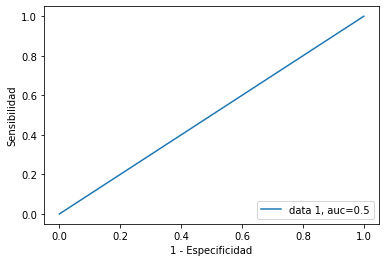

In [172]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(labels_test, labels_pred)
auc = metrics.roc_auc_score(labels_test, labels_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.xlabel("1 - Especificidad")
plt.ylabel("Sensibilidad")
plt.legend(loc=4)
plt.show()